In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [100]:
preds_current_stats = pd.read_csv('Nashville Pred. 22-23 Season Stats.csv')

In [101]:
#filtering to our cutoff
preds_current_stats = preds_current_stats.head(40)

In [5]:
szn_78 = pd.read_csv('data_cleaned/team_data_by_szn/teams_07_08.csv')

In [6]:
szn_78 = pd.read_csv('data_cleaned/team_data_by_szn/teams_07_08.csv')
szn_89 = pd.read_csv('data_cleaned/team_data_by_szn/teams_08_09.csv')
szn_910 = pd.read_csv('data_cleaned/team_data_by_szn/teams_09_10.csv')
szn_1011 = pd.read_csv('data_cleaned/team_data_by_szn/teams_10_11.csv')
szn_1112 = pd.read_csv('data_cleaned/team_data_by_szn/teams_11_12.csv')
szn_1314 = pd.read_csv('data_cleaned/team_data_by_szn/teams_13_14.csv')
szn_1415 = pd.read_csv('data_cleaned/team_data_by_szn/teams_14_15.csv')
szn_1516 = pd.read_csv('data_cleaned/team_data_by_szn/teams_15_16.csv')
szn_1617 = pd.read_csv('data_cleaned/team_data_by_szn/teams_16_17.csv')
szn_1718 = pd.read_csv('data_cleaned/team_data_by_szn/teams_17_18.csv')

In [7]:
szn_lists = [szn_78, szn_89, szn_910, szn_1011, szn_1112, szn_1314, szn_1415, szn_1516, szn_1617, szn_1718]

In [8]:
full_szns = pd.concat(szn_lists, axis=0, ignore_index=True)

In [9]:
#dropping null rows
full_szns.loc[full_szns['away_wins'] ==0].index.to_list()
full_szns = full_szns.drop(full_szns.loc[full_szns['away_wins'] ==0].index.to_list())

In [10]:
full_szns= full_szns.drop('Unnamed: 0', axis=1)

In [11]:
PO_teams = full_szns.loc[full_szns['made_playoffs']=="Yes"]

In [12]:
noPO_teams = full_szns.loc[full_szns['made_playoffs']=="No"]

In [13]:
(PO_teams.away_wins+PO_teams.home_wins).median()

46.0

In [14]:
#Importing data
full_szns = pd.read_csv('full_seasons.csv')
PO_teams = pd.read_csv('Playoff_Teams.csv')
noPO_teams.to_csv('Non_Playoff_Teams.csv')

### Is 46 a good benchmark for how many wins we should aim for the predators to end up with?

In [19]:
PO_teams['total_wins'] = PO_teams.away_wins+PO_teams.home_wins
noPO_teams['total_wins'] = noPO_teams.away_wins+noPO_teams.home_wins
full_szns['total_wins'] = full_szns.away_wins + full_szns.home_wins

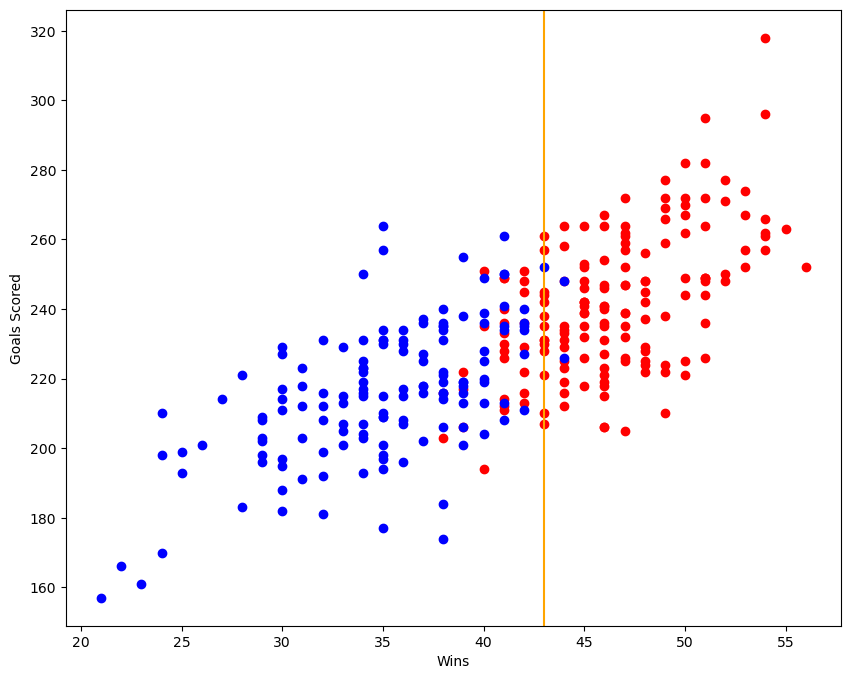

In [15]:
plt.figure(figsize=(10,8))
plt.scatter(x=PO_teams.total_wins,y = PO_teams.total_goals_scored,c="red")
plt.scatter(x=noPO_teams.total_wins,y = noPO_teams.total_goals_scored,c="blue")
plt.xlabel("Wins")
plt.ylabel("Goals Scored")
plt.axvline(x = 43, c='orange')

### Based on this plot, it seems very likely that a team will make it to playoffs if they have more than 43 wins

### What about goals scored / allowed?

In [16]:
PO_teams['goal_diff'] = PO_teams.total_goals_scored-PO_teams.total_goals_against
noPO_teams['goal_diff'] = noPO_teams.total_goals_scored-noPO_teams.total_goals_against
full_szns['goal_diff'] = full_szns.total_goals_scored-full_szns.total_goals_against

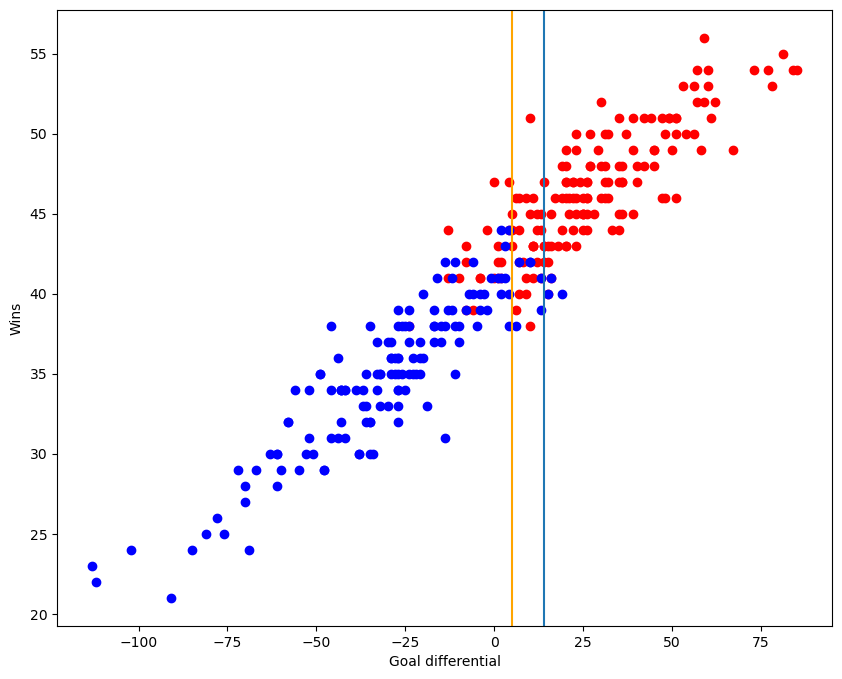

In [17]:
plt.figure(figsize=(10,8))
plt.scatter(x=PO_teams.goal_diff,y = PO_teams.total_wins,c="red")
plt.scatter(x=noPO_teams.goal_diff,y = noPO_teams.total_wins,c="blue")
plt.xlabel("Goal differential")
plt.ylabel("Wins")
plt.axvline(x = 14)
plt.axvline(x = 5, c='orange')


### If a team has a goal differntial of at least 14, they seem very likely to make it in to the playoffs. If a team has a goal differential greater than 5, they still seem likely to make the playoffs, but less likely. We can also see that wins and goal differential seem to have a linear relationship

<AxesSubplot:xlabel='made_playoffs', ylabel='total_wins'>

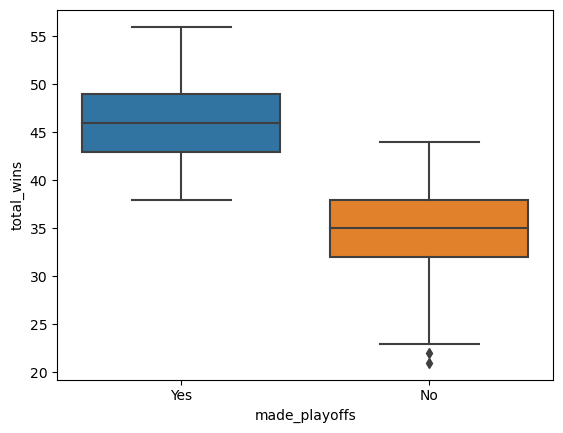

In [19]:
sns.boxplot(x='made_playoffs', y='total_wins', data=full_szns)

<AxesSubplot:xlabel='goal_diff', ylabel='total_wins'>

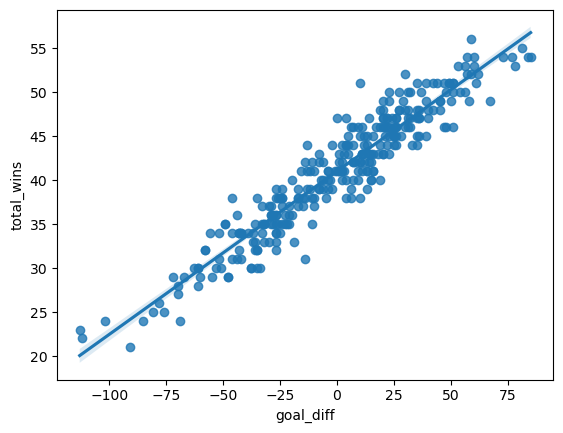

In [117]:
### do regplot
sns.regplot(x=full_szns.goal_diff, y = full_szns.total_wins, data=full_szns)

In [119]:
full_szns.corr()

Unnamed: 0  away_wins  home_wins  away_losses  \
Unnamed: 0             1.000000  -0.321791  -0.287193     0.321791   
away_wins             -0.321791   1.000000   0.474713    -1.000000   
home_wins             -0.287193   0.474713   1.000000    -0.474713   
away_losses            0.321791  -1.000000  -0.474713     1.000000   
home_losses            0.287193  -0.474713  -1.000000     0.474713   
total_goals_scored    -0.163022   0.600182   0.637289    -0.600182   
total_goals_against    0.409971  -0.636668  -0.605386     0.636668   
total_wins            -0.354361   0.855180   0.862170    -0.855180   
goal_diff             -0.378067   0.813322   0.816770    -0.813322   

                     home_losses  total_goals_scored  total_goals_against  \
Unnamed: 0              0.287193           -0.163022             0.409971   
away_wins              -0.474713            0.600182            -0.636668   
home_wins              -1.000000            0.637289            -0.605386   
away_losses             0.474713           -0.600182             0.636668   
home_losses             1.000000           -0.637289             0.605386   
total_goals_scored     -0.637289            1.000000            -0.156841   
total_goals_against     0.605386           -0.156841             1.000000   
total_wins             -0.862170            0.720783            -0.722997   
goal_diff              -0.816770            0.755823            -0.765216   

                     total_wins  goal_diff  
Unnamed: 0            -0.354361  -0.378067  
away_wins              0.855180   0.813322  
home_wins              0.862170   0.816770  
away_losses           -0.855180  -0.813322  
home_losses           -0.862170  -0.816770  
total_goals_scored     0.720783   0.755823  
total_goals_against   -0.722997  -0.765216  
total_wins             1.000000   0.949169  
goal_diff              0.949169   1.000000

In [17]:
#making dummy variable for regression
full_szns['binary_playoffs'] = full_szns['made_playoffs'].apply(lambda x: 1 if x == 'Yes' else 0)
full_szns.head()

Unnamed: 0            team_name  away_wins  home_wins  away_losses  \
0           0    New Jersey Devils       21.0       25.0         20.0   
1           1  Philadelphia Flyers       21.0       21.0         20.0   
2           2    Los Angeles Kings       15.0       17.0         26.0   
3           3  Tampa Bay Lightning       11.0       20.0         30.0   
4           4        Boston Bruins       20.0       21.0         21.0   

   home_losses  total_goals_scored  total_goals_against made_playoffs  \
0         16.0               206.0                197.0           Yes   
1         20.0               248.0                233.0           Yes   
2         24.0               231.0                266.0            No   
3         21.0               223.0                267.0            No   
4         20.0               212.0                222.0           Yes   

   total_wins  goal_diff  binary_playoffs  
0        46.0        9.0                1  
1        42.0       15.0                1  
2        32.0      -35.0                0  
3        31.0      -44.0                0  
4        41.0      -10.0                1

### Above, the regression line can be seen. Also, the correlation coefficient between goal_diff and total_wins is 0.95 - very high!

In [27]:
full_szns.to_csv('full_seasons.csv')
PO_teams.to_csv('Playoff_Teams.csv')
noPO_teams.to_csv('Non_Playoff_Teams.csv')

In [31]:
PO_teams = PO_teams.drop('Unnamed: 0', axis=1)

KeyError: "['Unnamed: 0'] not found in axis"

In [32]:
full_szns = full_szns.drop('Unnamed: 0', axis=1)


In [33]:
PO_teams

team_name  away_wins  home_wins  away_losses  home_losses  \
0        New Jersey Devils       21.0       25.0         20.0         16.0   
1      Philadelphia Flyers       21.0       21.0         20.0         20.0   
2            Boston Bruins       20.0       21.0         21.0         20.0   
3         New York Rangers       17.0       25.0         24.0         16.0   
4      Pittsburgh Penguins       21.0       26.0         20.0         15.0   
..                     ...        ...        ...          ...          ...   
155    Toronto Maple Leafs       20.0       29.0         21.0         12.0   
156     Colorado Avalanche       15.0       28.0         26.0         13.0   
157  Columbus Blue Jackets       19.0       26.0         22.0         15.0   
158          Winnipeg Jets       20.0       32.0         21.0          9.0   
159   Vegas Golden Knights       22.0       29.0         19.0         12.0   

     total_goals_scored  total_goals_against made_playoffs  total_wins  \
0                 206.0                197.0           Yes        46.0   
1                 248.0                233.0           Yes        42.0   
2                 212.0                222.0           Yes        41.0   
3                 213.0                199.0           Yes        42.0   
4                 247.0                216.0           Yes        47.0   
..                  ...                  ...           ...         ...   
155               277.0                232.0           Yes        49.0   
156               257.0                237.0           Yes        43.0   
157               242.0                230.0           Yes        45.0   
158               277.0                218.0           Yes        52.0   
159               272.0                228.0           Yes        51.0   

     goal_diff  
0          9.0  
1         15.0  
2        -10.0  
3         14.0  
4         31.0  
..         ...  
155       45.0  
156       20.0  
157       12.0  
158       59.0  
159       44.0  

[160 rows x 10 columns]

In [34]:
noPO_teams

team_name  away_wins  home_wins  away_losses  home_losses  \
2      Los Angeles Kings       15.0       17.0         26.0         24.0   
3    Tampa Bay Lightning       11.0       20.0         30.0         21.0   
10     Vancouver Canucks       18.0       21.0         23.0         20.0   
11    Chicago Blackhawks       17.0       23.0         24.0         18.0   
16        St Louis Blues       13.0       20.0         28.0         21.0   
..                   ...        ...        ...          ...          ...   
320       Calgary Flames       20.0       17.0         21.0         24.0   
322         Dallas Stars       16.0       26.0         25.0         15.0   
325      Edmonton Oilers       17.0       19.0         24.0         22.0   
327  Carolina Hurricanes       17.0       19.0         24.0         22.0   
328      Arizona Coyotes       13.0       16.0         28.0         25.0   

     total_goals_scored  total_goals_against made_playoffs  total_wins  \
2                 231.0                266.0            No        32.0   
3                 223.0                267.0            No        31.0   
10                213.0                215.0            No        39.0   
11                239.0                235.0            No        40.0   
16                205.0                237.0            No        33.0   
..                  ...                  ...           ...         ...   
320               218.0                248.0            No        37.0   
322               235.0                225.0            No        42.0   
325               234.0                263.0            No        36.0   
327               228.0                256.0            No        36.0   
328               208.0                256.0            No        29.0   

     goal_diff  
2        -35.0  
3        -44.0  
10        -2.0  
11         4.0  
16       -32.0  
..         ...  
320      -30.0  
322       10.0  
325      -29.0  
327      -28.0  
328      -48.0  

[141 rows x 10 columns]

In [35]:
full_szns

team_name  away_wins  home_wins  away_losses  home_losses  \
0       New Jersey Devils       21.0       25.0         20.0         16.0   
1     Philadelphia Flyers       21.0       21.0         20.0         20.0   
2       Los Angeles Kings       15.0       17.0         26.0         24.0   
3     Tampa Bay Lightning       11.0       20.0         30.0         21.0   
4           Boston Bruins       20.0       21.0         21.0         20.0   
..                    ...        ...        ...          ...          ...   
296         Winnipeg Jets       20.0       32.0         21.0          9.0   
297       Edmonton Oilers       17.0       19.0         24.0         22.0   
298  Vegas Golden Knights       22.0       29.0         19.0         12.0   
299   Carolina Hurricanes       17.0       19.0         24.0         22.0   
300       Arizona Coyotes       13.0       16.0         28.0         25.0   

     total_goals_scored  total_goals_against made_playoffs  total_wins  \
0                 206.0                197.0           Yes        46.0   
1                 248.0                233.0           Yes        42.0   
2                 231.0                266.0            No        32.0   
3                 223.0                267.0            No        31.0   
4                 212.0                222.0           Yes        41.0   
..                  ...                  ...           ...         ...   
296               277.0                218.0           Yes        52.0   
297               234.0                263.0            No        36.0   
298               272.0                228.0           Yes        51.0   
299               228.0                256.0            No        36.0   
300               208.0                256.0            No        29.0   

     goal_diff  binary_playoffs  
0          9.0                1  
1         15.0                1  
2        -35.0                0  
3        -44.0                0  
4        -10.0                1  
..         ...              ...  
296       59.0                1  
297      -29.0                0  
298       44.0                1  
299      -28.0                0  
300      -48.0                0  

[301 rows x 11 columns]

In [36]:
full_szns.to_csv('full_seasons.csv')
PO_teams.to_csv('Playoff_Teams.csv')
noPO_teams.to_csv('Non_Playoff_Teams.csv')

# boxplots of various stats vs made_playoffs

<AxesSubplot:xlabel='made_playoffs', ylabel='total_goals_scored'>

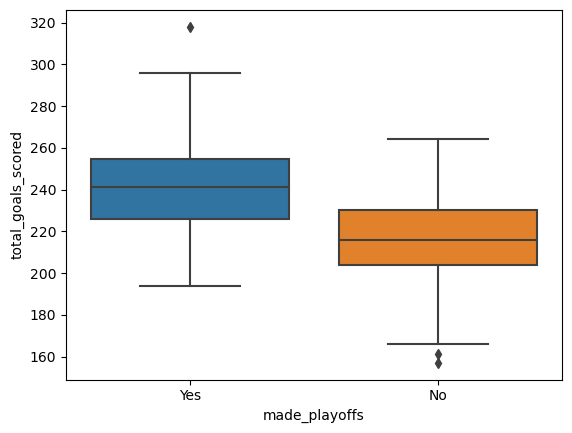

In [137]:
sns.boxplot(x='made_playoffs', y= 'total_goals_scored', data = full_szns)

<AxesSubplot:xlabel='made_playoffs', ylabel='total_goals_against'>

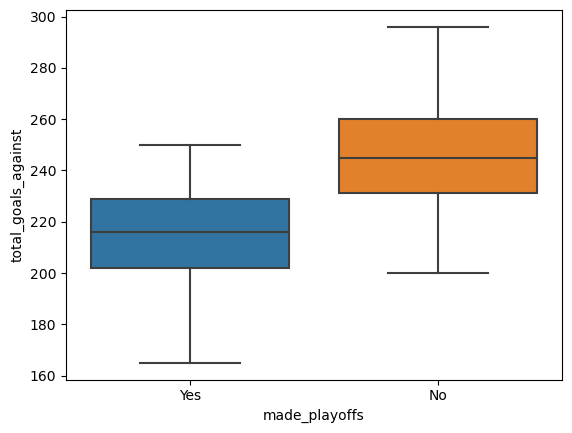

In [139]:
sns.boxplot(x='made_playoffs', y= 'total_goals_against', data = full_szns)

In [146]:
full_szns.corr()

away_wins  home_wins  away_losses  home_losses  \
away_wins             1.000000   0.474713    -1.000000    -0.474713   
home_wins             0.474713   1.000000    -0.474713    -1.000000   
away_losses          -1.000000  -0.474713     1.000000     0.474713   
home_losses          -0.474713  -1.000000     0.474713     1.000000   
total_goals_scored    0.600182   0.637289    -0.600182    -0.637289   
total_goals_against  -0.636668  -0.605386     0.636668     0.605386   
total_wins            0.855180   0.862170    -0.855180    -0.862170   
goal_diff             0.813322   0.816770    -0.813322    -0.816770   

                     total_goals_scored  total_goals_against  total_wins  \
away_wins                      0.600182            -0.636668    0.855180   
home_wins                      0.637289            -0.605386    0.862170   
away_losses                   -0.600182             0.636668   -0.855180   
home_losses                   -0.637289             0.605386   -0.862170   
total_goals_scored             1.000000            -0.156841    0.720783   
total_goals_against           -0.156841             1.000000   -0.722997   
total_wins                     0.720783            -0.722997    1.000000   
goal_diff                      0.755823            -0.765216    0.949169   

                     goal_diff  
away_wins             0.813322  
home_wins             0.816770  
away_losses          -0.813322  
home_losses          -0.816770  
total_goals_scored    0.755823  
total_goals_against  -0.765216  
total_wins            0.949169  
goal_diff             1.000000

## Making models

In [51]:
#model simple linear regression
model = smf.ols(formula = 'total_wins~goal_diff', data = full_szns).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             total_wins   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     2719.
Date:                Tue, 28 Feb 2023   Prob (F-statistic):          3.84e-152
Time:                        11:54:18   Log-Likelihood:                -670.98
No. Observations:                 301   AIC:                             1346.
Df Residuals:                     299   BIC:                             1353.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.0000      0.130    315.317      0.000      40.744      41.256
goal_diff      0.1853      0.004     52.142      0.000       0.178       0.192
==============================================================================
Omnibus:                        2.316   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.314   Jarque-Bera (JB):                2.066
Skew:                           0.130   Prob(JB):                        0.356
Kurtosis:                       3.312   Cond. No.                         36.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
model.get_prediction({'goal_diff' : -5}).summary_frame(alpha=0.05)
#95% confident that they will have between 39 and 40 wins, not enough

mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  40.073313  0.131237      39.815048      40.331578      35.62635   

   obs_ci_upper  
0     44.520276

In [63]:
model.get_prediction({'goal_diff' : 13}).summary_frame(alpha=0.05)
#95% confident that they will have 43 wins, meets the threshold

mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  43.409386  0.137994      43.137822      43.680949      38.96163   

   obs_ci_upper  
0     47.857141

In [47]:
#model with team_names
model = smf.ols(formula = 'total_wins~team_name + goal_diff', data = full_szns).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             total_wins   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     86.83
Date:                Tue, 28 Feb 2023   Prob (F-statistic):          1.90e-123
Time:                        11:52:07   Log-Likelihood:                -648.34
No. Observations:                 301   AIC:                             1365.
Df Residuals:                     267   BIC:                             1491.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             42.7788      0.702     60.923      0.000      41.396      44.161
team_name[T.Arizona Coyotes]          -1.7561      1.349     -1.302      0.194      -4.413       0.900
team_name[T.Atlanta Thrashers]        -1.4762      1.327     -1.112      0.267      -4.089       1.137
team_name[T.Boston Bruins]            -3.6535      0.996     -3.668      0.000      -5.615      -1.692
team_name[T.Buffalo Sabres]           -3.1774      1.006     -3.160      0.002      -5.157      -1.198
team_name[T.Calgary Flames]           -1.1830      0.994     -1.191      0.235      -3.140       0.773
team_name[T.Carolina Hurricanes]      -2.5284      0.999     -2.531      0.012      -4.495      -0.562
team_name[T.Chicago Blackhawks]       -2.7506      0.993     -2.771      0.006      -4.705      -0.796
team_name[T.Colorado Avalanche]       -0.5397      1.000     -0.540      0.590      -2.509       1.429
team_name[T.Columbus Blue Jackets]    -1.7688      0.997     -1.775      0.077      -3.731       0.194
team_name[T.Dallas Stars]             -1.6937      0.992     -1.708      0.089      -3.647       0.259
team_name[T.Detroit Red Wings]        -2.0000      0.990     -2.020      0.044      -3.950      -0.050
team_name[T.Edmonton Oilers]          -2.5412      1.015     -2.504      0.013      -4.539      -0.543
team_name[T.Florida Panthers]         -2.2654      0.999     -2.268      0.024      -4.232      -0.299
team_name[T.Los Angeles Kings]        -3.1223      0.990     -3.153      0.002      -5.072      -1.173
team_name[T.Minnesota Wild]           -1.8377      0.991     -1.855      0.065      -3.789       0.113
team_name[T.Montreal Canadiens]       -2.0970      0.991     -2.116      0.035      -4.048      -0.146
team_name[T.Nashville Predators]      -0.9260      0.990     -0.935      0.351      -2.876       1.024
team_name[T.New Jersey Devils]        -0.7201      0.994     -0.725      0.469      -2.676       1.236
team_name[T.New York Islanders]       -1.2552      1.006     -1.247      0.213      -3.237       0.726
team_name[T.New York Rangers]         -1.8402      0.991     -1.857      0.064      -3.791       0.110
team_name[T.Ottawa Senators]          -1.2726      0.998     -1.276      0.203      -3.237       0.691
team_name[T.Philadelphia Flyers]      -2.6262      0.990     -2.652      0.008      -4.576      -0.676
team_name[T.Phoenix Coyotes]          -0.6681      1.146     -0.583      0.560      -2.925       1.588
team_name[T.Pittsburgh Penguins]      -1.2908      0.995     -1.297      0.196      -3.250       0.668
team_name[T.San Jose Sharks]          -1.1874      0.993     -1.195      0.233      -3.143       0.769
team_name[T.St Louis Blues]           -1.6070      0.991     -1.622      0.106      -3.557      

In [147]:
#model simple linear regression
model = smf.ols(formula = 'away_wins~goal_diff', data = full_szns).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              away_wins   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     584.3
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           2.65e-72
Time:                        13:23:11   Log-Likelihood:                -689.64
No. Observations:                 301   AIC:                             1383.
Df Residuals:                     299   BIC:                             1391.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.5947      0.138    134.408      0.000      18.322      18.867
goal_diff      0.0914      0.004     24.172      0.000       0.084       0.099
==============================================================================
Omnibus:                        1.273   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.529   Jarque-Bera (JB):                1.294
Skew:                           0.156   Prob(JB):                        0.524
Kurtosis:                       2.924   Cond. No.                         36.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [153]:
model.get_prediction({'goal_diff' : -5}).summary_frame(alpha=0.05)
#95% confident that they will have between 17 and 18 away wins

mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  18.137616  0.139631      17.862832        18.4124     13.406221   

   obs_ci_upper  
0      22.86901

In [110]:
#model simple linear regression
model = smf.ols(formula = 'home_wins~goal_diff', data = full_szns).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              home_wins   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     599.2
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           2.16e-73
Time:                        17:47:19   Log-Likelihood:                -694.00
No. Observations:                 301   AIC:                             1392.
Df Residuals:                     299   BIC:                             1399.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.4053      0.140    159.624      0.000      22.129      22.682
goal_diff      0.0939      0.004     24.479      0.000       0.086       0.101
==============================================================================
Omnibus:                        0.344   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.842   Jarque-Bera (JB):                0.390
Skew:                          -0.080   Prob(JB):                        0.823
Kurtosis:                       2.928   Cond. No.                         36.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
model.get_prediction({'goal_diff' : -5}).summary_frame(alpha=0.05)
#95% confident that they will have between 21 and 22 away wins

mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  21.935697  0.141668      21.656905       22.21449      17.13528   

   obs_ci_upper  
0     26.736115

In [151]:
preds_away['Goals For'].sum() - preds_away['Goals Against'].sum()

-5.0

In [152]:
preds_home['Goals For'].sum() - preds_home['Goals Against'].sum()

0.0

In [154]:
model = smf.ols(formula = 'home_wins~goal_diff', data = full_szns).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              home_wins   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     599.2
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           2.16e-73
Time:                        13:40:35   Log-Likelihood:                -694.00
No. Observations:                 301   AIC:                             1392.
Df Residuals:                     299   BIC:                             1399.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.4053      0.140    159.624      0.000      22.129      22.682
goal_diff      0.0939      0.004     24.479      0.000       0.086       0.101
==============================================================================
Omnibus:                        0.344   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.842   Jarque-Bera (JB):                0.390
Skew:                          -0.080   Prob(JB):                        0.823
Kurtosis:                       2.928   Cond. No.                         36.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [155]:
model.get_prediction({'goal_diff' : -5}).summary_frame(alpha=0.05)


mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  21.935697  0.141668      21.656905       22.21449      17.13528   

   obs_ci_upper  
0     26.736115

## goals scored: 112
## goals against: 117

In [69]:
model.get_prediction({'team_name': 'Nashville Predators', 'goal_diff' : -5}).summary_frame(alpha=0.05)

mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  40.073313  0.131237      39.815048      40.331578      35.62635   

   obs_ci_upper  
0     44.520276

Based on goal differential alone, if the preds keep their current differential of 2, we can assume with 95% accuracy that they will end the season with 39-40 wins. Thats a bit below the cutoff for being likely to make playoffs based on our EDA, so they need to improve their goal differential.

In [61]:
model.get_prediction({'team_name': 'Nashville Predators', 'goal_diff' : 13}).summary_frame(alpha=0.05)

mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  43.409386  0.137994      43.137822      43.680949      38.96163   

   obs_ci_upper  
0     47.857141

 ### using the model, we can try to predict what goal differential is needed to be likely to have a record of 43 or more (the cutoff we found earlier for being likely to make playoffs). The model suggest that a goal differential of 13 gives us 95% confidence that a team will have a record of 43 games won, which is close to our cutoff of being playoff likely with a GD of 14.

# Training and test data

In [135]:
from sklearn.model_selection import train_test_split

In [136]:
train, test = train_test_split(full_szns, test_size=0.2)

## simple linear regression model

In [97]:
full_szns.columns

Index(['Unnamed: 0', 'team_name', 'away_wins', 'home_wins', 'away_losses',
       'home_losses', 'total_goals_scored', 'total_goals_against',
       'made_playoffs', 'total_wins', 'goal_diff'],
      dtype='object')

In [144]:
model = smf.ols(formula = 'total_wins~goal_diff', data = train).fit()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             total_wins   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1516.
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          8.76e-136
Time:                        21:31:55   Log-Likelihood:                -505.09
No. Observations:                 240   AIC:                             1016.
Df Residuals:                     237   BIC:                             1027.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.7041      1.205     25.470      0.000      28.329      33.079
home_wins      0.4562      0.053      8.559      0.000       0.351       0.561
goal_diff      0.1432      0.006     23.549      0.000       0.131       0.155
==============================================================================
Omnibus:                        2.541   Durbin-Watson:                   2.208
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                2.215
Skew:                           0.220   Prob(JB):                        0.330
Kurtosis:                       3.166   Cond. No.                         355.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [145]:
prediction = model.predict(test)

In [146]:
#RSME
np.sqrt(((test.total_wins - prediction)**2).mean())

1.9402469738551342

including away record on model yeilds best RSME

In [136]:
preds_current_stats['Goals Against'].sum()

167.0

In [102]:
#home wins
preds_home = preds_current_stats.loc[preds_current_stats['Unnamed: 3'] != '@']
print('Home record:', len(preds_home.loc[preds_home.Result == 'W']), '-', len(preds_home.loc[preds_home.Result == 'L']))

Home record: 9 - 9


In [103]:
preds_away = preds_current_stats.loc[preds_current_stats['Unnamed: 3'] == '@']
print('Away record:', len(preds_away.loc[preds_away.Result == 'W']), '-', len(preds_away.loc[preds_away.Result == 'L']))

Away record: 10 - 12


In [112]:
full_szns.median()

C:\Users\David\AppData\Local\Temp\ipykernel_11560\3010576682.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  full_szns.median()


Unnamed: 0              15.0
away_wins               19.0
home_wins               23.0
away_losses             22.0
home_losses             18.0
total_goals_scored     229.0
total_goals_against    229.0
total_wins              41.0
goal_diff                4.0
dtype: float64

In [ ]:
model.get_prediction({'total_goals_scored' : -10}).summary_frame(alpha=0.05)

# Predicting how many wins Preds will have

In [140]:
full_szns.columns

Index(['team_name', 'away_wins', 'home_wins', 'away_losses', 'home_losses',
       'total_goals_scored', 'total_goals_against', 'made_playoffs',
       'total_wins', 'goal_diff'],
      dtype='object')

In [141]:
preds_prediction_df = pd.DataFrame(columns=['team_name', 'away_wins', 'home_wins', 'away_losses', 'home_losses',
       'total_goals_scored', 'total_goals_against', 'made_playoffs',
       'total_wins', 'goal_diff'])

In [143]:
preds_prediction_df.loc[len(preds_prediction_df.index)] = ['Nashville Predators', 10, 9, 12, 9, 11, 112, 117, '?', 19, -5] 


ValueError: cannot set a row with mismatched columns

# Trying to find the best predictors

In [37]:
full_szns

team_name  away_wins  home_wins  away_losses  home_losses  \
0       New Jersey Devils       21.0       25.0         20.0         16.0   
1     Philadelphia Flyers       21.0       21.0         20.0         20.0   
2       Los Angeles Kings       15.0       17.0         26.0         24.0   
3     Tampa Bay Lightning       11.0       20.0         30.0         21.0   
4           Boston Bruins       20.0       21.0         21.0         20.0   
..                    ...        ...        ...          ...          ...   
296         Winnipeg Jets       20.0       32.0         21.0          9.0   
297       Edmonton Oilers       17.0       19.0         24.0         22.0   
298  Vegas Golden Knights       22.0       29.0         19.0         12.0   
299   Carolina Hurricanes       17.0       19.0         24.0         22.0   
300       Arizona Coyotes       13.0       16.0         28.0         25.0   

     total_goals_scored  total_goals_against made_playoffs  total_wins  \
0                 206.0                197.0           Yes        46.0   
1                 248.0                233.0           Yes        42.0   
2                 231.0                266.0            No        32.0   
3                 223.0                267.0            No        31.0   
4                 212.0                222.0           Yes        41.0   
..                  ...                  ...           ...         ...   
296               277.0                218.0           Yes        52.0   
297               234.0                263.0            No        36.0   
298               272.0                228.0           Yes        51.0   
299               228.0                256.0            No        36.0   
300               208.0                256.0            No        29.0   

     goal_diff  binary_playoffs  
0          9.0                1  
1         15.0                1  
2        -35.0                0  
3        -44.0                0  
4        -10.0                1  
..         ...              ...  
296       59.0                1  
297      -29.0                0  
298       44.0                1  
299      -28.0                0  
300      -48.0                0  

[301 rows x 11 columns]

In [38]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import time

## Home regression

In [88]:
lst = full_szns.columns.tolist()
lst.pop(0)
lst.pop(-4)
lst.pop(-1)
lst.pop(-2)
lst.pop(0)
lst.pop(1)
lst

['home_wins',
 'home_losses',
 'total_goals_scored',
 'total_goals_against',
 'goal_diff']

In [89]:
X = full_szns[lst]

In [90]:
#Function to develop a model based on all predictors in predictor_subset
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = sm.ols('total_wins~' + '+'.join(predictor_subset),data = full_szns).fit()
    Rsquared = model.rsquared
    return {"model":model, "Rsquared":Rsquared}

In [91]:
def getBest_model(k):
    tic = time.time()
    results = []
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset((list(combo))))

    # Wrap everything up in a dataframe
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    return best_model

In [92]:
models_best = pd.DataFrame(columns=["Rsquared", "model"])

tic = time.time()
for i in range(1,1+X.shape[1]):
    models_best.loc[i] = getBest_model(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed 5 models on 1 predictors in 0.10400390625 seconds.
Processed 10 models on 2 predictors in 0.21601605415344238 seconds.
Processed 10 models on 3 predictors in 0.7162139415740967 seconds.
Processed 5 models on 4 predictors in 0.42830467224121094 seconds.
Processed 1 models on 5 predictors in 0.09707260131835938 seconds.
Total elapsed time: 1.6456632614135742 seconds.


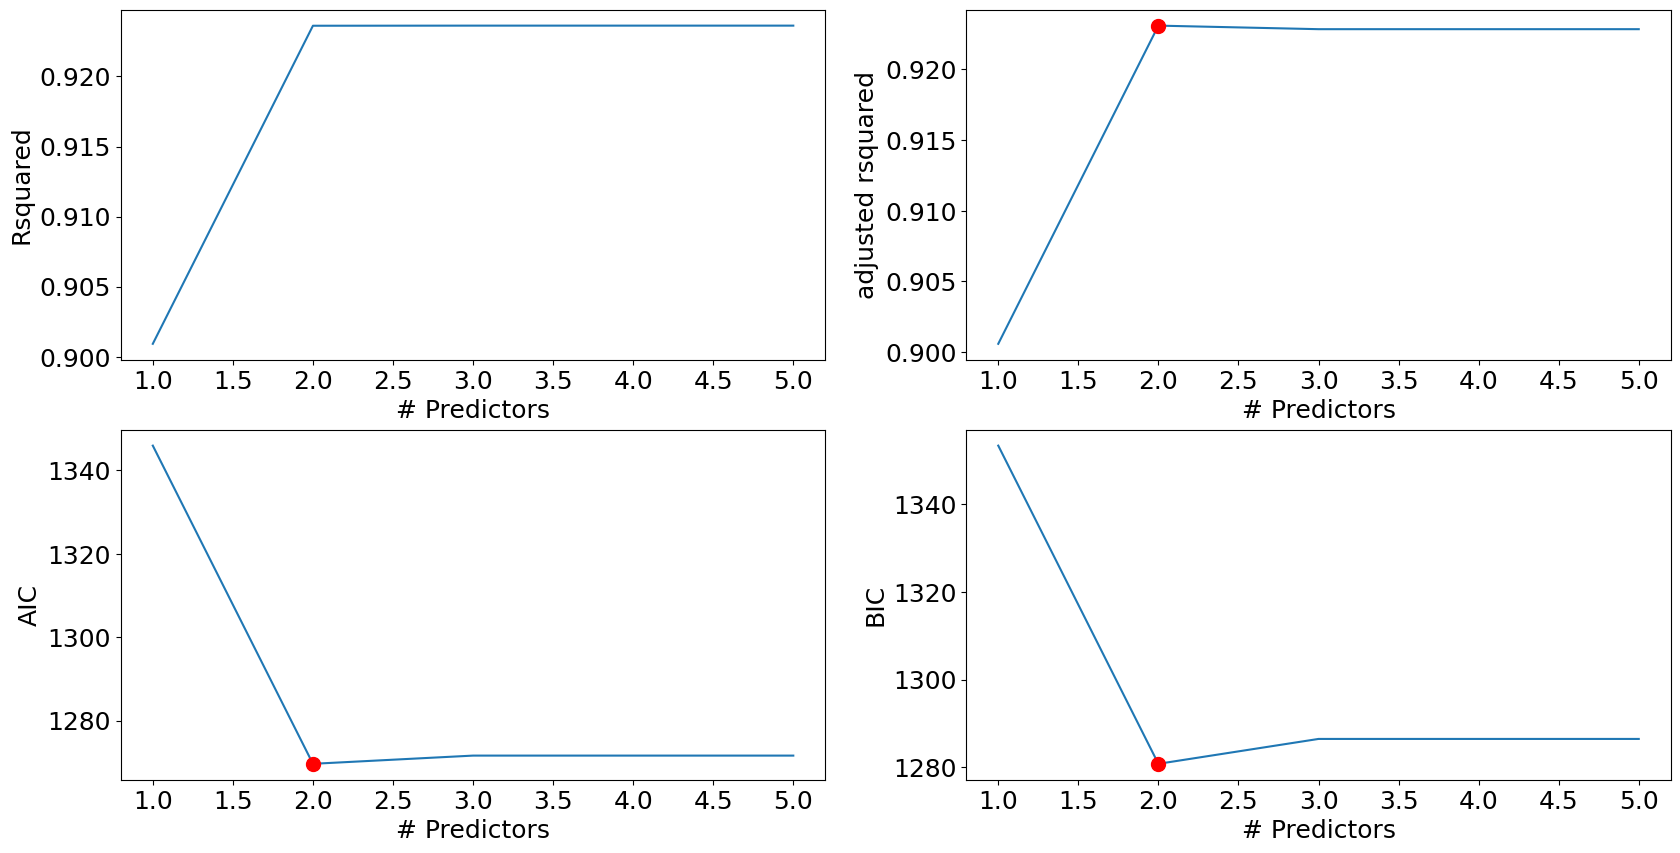

In [93]:
def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # Set up a 2x2 grid so we can look at 4 plots at once
    plt.subplot(2, 2, 1)

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector
    plt.plot(models_best["Rsquared"])
    plt.xlabel('# Predictors')
    plt.ylabel('Rsquared')

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector

    rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

    plt.subplot(2, 2, 2)
    plt.plot(rsquared_adj)
    plt.plot(1+rsquared_adj.argmax(), rsquared_adj.max(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('adjusted rsquared')

    # We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
    aic = models_best.apply(lambda row: row[1].aic, axis=1)

    plt.subplot(2, 2, 3)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(2, 2, 4)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')
best_sub_plots()

In [94]:
best_subset_model_home = models_best.loc[2,'model']
best_subset_model_home.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             total_wins   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     1802.
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          3.69e-167
Time:                        17:23:35   Log-Likelihood:                -631.83
No. Observations:                 301   AIC:                             1270.
Df Residuals:                     298   BIC:                             1281.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      49.2441      0.884     55.732      0.000      47.505      50.983
home_losses    -0.4434      0.047     -9.409      0.000      -0.536      -0.351
goal_diff       0.1437      0.005     26.520      0.000       0.133       0.154
==============================================================================
Omnibus:                        1.164   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.559   Jarque-Bera (JB):                1.086
Skew:                           0.147   Prob(JB):                        0.581
Kurtosis:                       2.998   Cond. No.                         285.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Away regression

In [95]:
lst2 = full_szns.columns.tolist()
lst2.pop(0)
lst2.pop(-4)
lst2.pop(-1)
lst2.pop(-2)
lst2.pop(1)
lst2.pop(2)

'home_losses'

In [96]:
X = full_szns[lst2]

In [97]:
models_best = pd.DataFrame(columns=["Rsquared", "model"])

tic = time.time()
for i in range(1,1+X.shape[1]):
    models_best.loc[i] = getBest_model(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed 5 models on 1 predictors in 0.08000516891479492 seconds.
Processed 10 models on 2 predictors in 0.3040280342102051 seconds.
Processed 10 models on 3 predictors in 0.4322800636291504 seconds.
Processed 5 models on 4 predictors in 0.5126228332519531 seconds.
Processed 1 models on 5 predictors in 0.047144174575805664 seconds.
Total elapsed time: 1.4320847988128662 seconds.


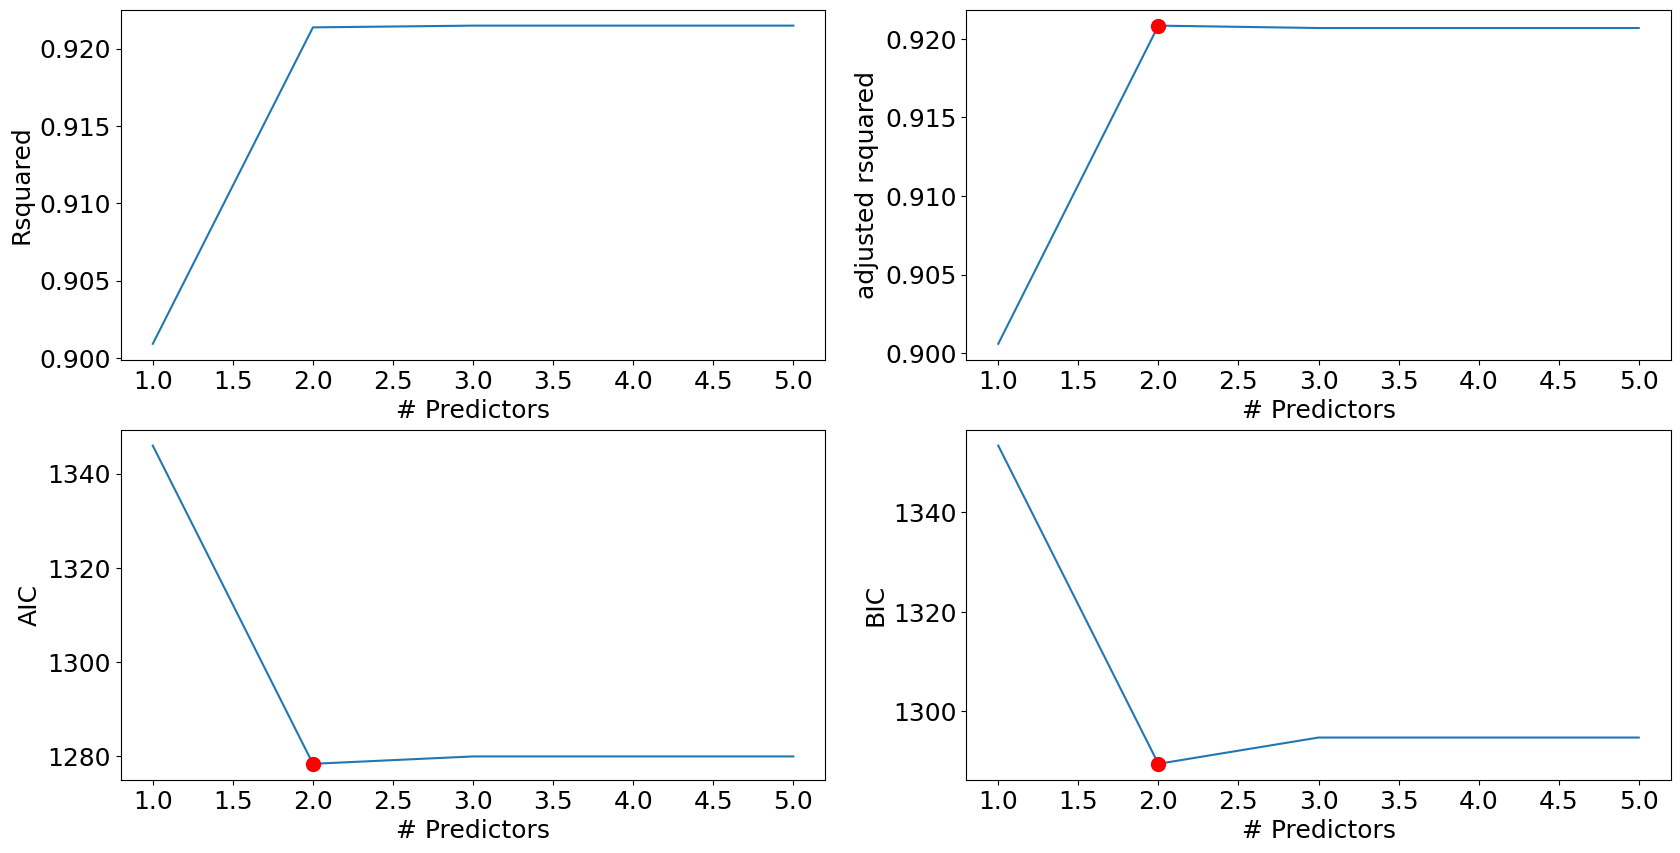

In [98]:
best_sub_plots()

In [99]:
best_subset_model_away = models_best.loc[2,'model']
best_subset_model_away.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             total_wins   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     1746.
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          2.76e-165
Time:                        17:24:13   Log-Likelihood:                -636.18
No. Observations:                 301   AIC:                             1278.
Df Residuals:                     298   BIC:                             1289.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.0601      0.909     36.357      0.000      31.271      34.850
away_wins      0.4270      0.049      8.804      0.000       0.332       0.522
goal_diff      0.1463      0.005     26.837      0.000       0.136       0.157
==============================================================================
Omnibus:                        0.505   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.777   Jarque-Bera (JB):                0.316
Skew:                           0.060   Prob(JB):                        0.854
Kurtosis:                       3.104   Cond. No.                         289.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
preds_home

GP      Date     Time Unnamed: 3             Opponent  Goals For  \
0    1   10/7/22  2:00 PM        NaN      San Jose Sharks        4.0   
2    3  10/13/22  8:30 PM        NaN         Dallas Stars        1.0   
4    5  10/18/22  9:30 PM        NaN    Los Angeles Kings        3.0   
6    7  10/22/22  8:00 PM        NaN  Philadelphia Flyers        1.0   
7    8  10/27/22  8:00 PM        NaN      St. Louis Blues        6.0   
8    9  10/29/22  8:00 PM        NaN  Washington Capitals        0.0   
14  15  11/12/22  8:00 PM        NaN     New York Rangers        2.0   
15  16  11/15/22  8:00 PM        NaN       Minnesota Wild        2.0   
16  17  11/17/22  8:00 PM        NaN   New York Islanders        5.0   
17  18  11/19/22  8:00 PM        NaN  Tampa Bay Lightning        2.0   
18  19  11/21/22  8:00 PM        NaN      Arizona Coyotes        4.0   
20  21  11/29/22  8:00 PM        NaN        Anaheim Ducks        2.0   
24  25  12/10/22  1:30 PM        NaN      Ottawa Senators        2.0   
26  27  12/13/22  8:00 PM        NaN      Edmonton Oilers        3.0   
29  30  12/19/22  8:00 PM        NaN      Edmonton Oilers        4.0   
31  32  12/23/22  8:00 PM        NaN   Colorado Avalanche        2.0   
32  33  12/27/22  8:00 PM        NaN         Dallas Stars        2.0   
35  36    1/3/23  8:00 PM        NaN   Montreal Canadiens        6.0   

    Goals Against Result Unnamed: 8     W     L   OL Streak    Att.   LOG  \
0             1.0      W        NaN   1.0   0.0  0.0    W 1  16,648  2:43   
2             4.0      L        NaN   2.0   1.0  0.0    L 1  17,692  2:26   
4             4.0      L         SO   2.0   2.0  1.0    L 3  17,159  2:35   
6             3.0      L        NaN   2.0   4.0  1.0    L 5  17,470  2:34   
7             2.0      W        NaN   3.0   4.0  1.0    W 1  17,159  2:19   
8             3.0      L        NaN   3.0   5.0  1.0    L 1  17,159  2:32   
14            1.0      W        NaN   6.0   8.0  1.0    W 1  17,169  2:25   
15            1.0      W        NaN   7.0   8.0  1.0    W 2  17,159  2:32   
16            4.0      W        NaN   8.0   8.0  1.0    W 3  17,159  2:25   
17            3.0      L         OT   8.0   8.0  2.0    L 1  17,444  2:32   
18            3.0      W         SO   9.0   8.0  2.0    W 1  17,159  2:46   
20            1.0      W         OT  10.0   9.0  2.0    W 1  17,159  2:28   
24            3.0      L        NaN  12.0  11.0  2.0    L 2  17,414  2:34   
26            6.0      L        NaN  12.0  12.0  3.0    L 4  17,159  2:28   
29            3.0      W         OT  13.0  13.0  4.0    W 1  17,558  2:23   
31            3.0      L         OT  14.0  13.0  5.0    L 1  17,159  2:36   
32            3.0      L        NaN  14.0  14.0  5.0    L 2  17,768  2:26   
35            3.0      W        NaN  16.0  14.0  6.0    W 1  17,581  2:28   

    Notes  
0     NaN  
2     NaN  
4     NaN  
6     NaN  
7     NaN  
8     NaN  
14    NaN  
15    NaN  
16    NaN  
17    NaN  
18    NaN  
20    NaN  
24    NaN  
26    NaN  
29    NaN  
31    NaN  
32    NaN  
35    NaN

In [104]:
preds_current_stats

GP      Date      Time Unnamed: 3               Opponent  Goals For  \
0    1   10/7/22   2:00 PM        NaN        San Jose Sharks        4.0   
1    2   10/8/22   2:00 PM          @        San Jose Sharks        3.0   
2    3  10/13/22   8:30 PM        NaN           Dallas Stars        1.0   
3    4  10/15/22   8:00 PM          @           Dallas Stars        1.0   
4    5  10/18/22   9:30 PM        NaN      Los Angeles Kings        3.0   
5    6  10/20/22   7:00 PM          @  Columbus Blue Jackets        3.0   
6    7  10/22/22   8:00 PM        NaN    Philadelphia Flyers        1.0   
7    8  10/27/22   8:00 PM        NaN        St. Louis Blues        6.0   
8    9  10/29/22   8:00 PM        NaN    Washington Capitals        0.0   
9   10   11/1/22   9:00 PM          @        Edmonton Oilers        4.0   
10  11   11/3/22   9:00 PM          @         Calgary Flames        4.0   
11  12   11/5/22  10:00 PM          @      Vancouver Canucks        4.0   
12  13   11/8/22  10:00 PM          @         Seattle Kraken        1.0   
13  14  11/10/22   9:00 PM          @     Colorado Avalanche        3.0   
14  15  11/12/22   8:00 PM        NaN       New York Rangers        2.0   
15  16  11/15/22   8:00 PM        NaN         Minnesota Wild        2.0   
16  17  11/17/22   8:00 PM        NaN     New York Islanders        5.0   
17  18  11/19/22   8:00 PM        NaN    Tampa Bay Lightning        2.0   
18  19  11/21/22   8:00 PM        NaN        Arizona Coyotes        4.0   
19  20  11/23/22   7:00 PM          @      Detroit Red Wings        0.0   
20  21  11/29/22   8:00 PM        NaN          Anaheim Ducks        2.0   
21  22   12/1/22   7:00 PM          @      New Jersey Devils        4.0   
22  23   12/2/22   7:30 PM          @     New York Islanders        4.0   
23  24   12/8/22   7:00 PM          @    Tampa Bay Lightning        2.0   
24  25  12/10/22   1:30 PM        NaN        Ottawa Senators        2.0   
25  26  12/12/22   8:00 PM          @        St. Louis Blues        0.0   
26  27  12/13/22   8:00 PM        NaN        Edmonton Oilers        3.0   
27  28  12/15/22   8:00 PM          @          Winnipeg Jets        1.0   
28  29  12/17/22   9:00 PM          @     Colorado Avalanche        1.0   
29  30  12/19/22   8:00 PM        NaN        Edmonton Oilers        4.0   
30  31  12/21/22   8:30 PM          @     Chicago Blackhawks        4.0   
31  32  12/23/22   8:00 PM        NaN     Colorado Avalanche        2.0   
32  33  12/27/22   8:00 PM        NaN           Dallas Stars        2.0   
33  34  12/30/22   5:00 PM          @          Anaheim Ducks        6.0   
34  35  12/31/22   3:00 PM          @   Vegas Golden Knights        4.0   
35  36    1/3/23   8:00 PM        NaN     Montreal Canadiens        6.0   
36  37    1/5/23   7:00 PM          @    Carolina Hurricanes        5.0   
37  38    1/6/23   7:00 PM          @    Washington Capitals        3.0   
38  39    1/9/23   7:30 PM          @        Ottawa Senators        3.0   
39  40   1/11/23   7:30 PM          @    Toronto Maple Leafs        1.0   

    Goals Against Result Unnamed: 8     W     L   OL Streak    Att.   LOG  \
0             1.0      W        NaN   1.0   0.0  0.0    W 1  16,648  2:43   
1             2.0      W        NaN   2.0   0.0  0.0    W 2  17,023  2:33   
2             4.0      L        NaN   2.0   1.0  0.0    L 1  17,692  2:26   
3             5.0      L        NaN   2.0   2.0  0.0    L 2  18,532  2:30   
4             4.0      L         SO   2.0   2.0  1.0    L 3  17,159  2:35   
5             5.0      L        NaN   2.0   3.0  1.0    L 4  14,691  2:37   
6             3.0      L        NaN   2.0   4.0  1.0    L 5  17,470  2:34   
7             2.0      W        NaN   3.0   4.0  1.0    W 1  17,159  2:19   
8             3.0      L        NaN   3.0   5.0  1.0    L 1  17,159  2:32   
9             7.0      L        NaN   3.0   6.0  1.0    L 2  16,812  2:37   
10            1.0      W        NaN   4.0   6.0  1.0    W 1  16,984  2:31   
11  

In [106]:
preds_away['Goals For'].sum() - preds_away['Goals Against'].sum()

-5.0

In [107]:
preds_home['Goals For'].sum() - preds_home['Goals Against'].sum()

0.0

Preds are 9-9 at home, and 10-12 away.

At home, they have an even goal differential. Away, they have a -5 goal differential

In [112]:
full_szns

team_name  away_wins  home_wins  away_losses  home_losses  \
0       New Jersey Devils       21.0       25.0         20.0         16.0   
1     Philadelphia Flyers       21.0       21.0         20.0         20.0   
2       Los Angeles Kings       15.0       17.0         26.0         24.0   
3     Tampa Bay Lightning       11.0       20.0         30.0         21.0   
4           Boston Bruins       20.0       21.0         21.0         20.0   
..                    ...        ...        ...          ...          ...   
296         Winnipeg Jets       20.0       32.0         21.0          9.0   
297       Edmonton Oilers       17.0       19.0         24.0         22.0   
298  Vegas Golden Knights       22.0       29.0         19.0         12.0   
299   Carolina Hurricanes       17.0       19.0         24.0         22.0   
300       Arizona Coyotes       13.0       16.0         28.0         25.0   

     total_goals_scored  total_goals_against made_playoffs  total_wins  \
0                 206.0                197.0           Yes        46.0   
1                 248.0                233.0           Yes        42.0   
2                 231.0                266.0            No        32.0   
3                 223.0                267.0            No        31.0   
4                 212.0                222.0           Yes        41.0   
..                  ...                  ...           ...         ...   
296               277.0                218.0           Yes        52.0   
297               234.0                263.0            No        36.0   
298               272.0                228.0           Yes        51.0   
299               228.0                256.0            No        36.0   
300               208.0                256.0            No        29.0   

     goal_diff  binary_playoffs  
0          9.0                1  
1         15.0                1  
2        -35.0                0  
3        -44.0                0  
4        -10.0                1  
..         ...              ...  
296       59.0                1  
297      -29.0                0  
298       44.0                1  
299      -28.0                0  
300      -48.0                0  

[301 rows x 11 columns]

In [124]:
lst = full_szns.columns.tolist()
lst.pop(0)
lst.pop(-4)
lst.pop(-1)

'binary_playoffs'

In [125]:
X = full_szns[lst]

In [126]:
#Function to develop a model based on all predictors in predictor_subset
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = sm.ols('binary_playoffs~' + '+'.join(predictor_subset),data = full_szns).fit()
    Rsquared = model.rsquared
    return {"model":model, "Rsquared":Rsquared}

In [127]:
models_best = pd.DataFrame(columns=["Rsquared", "model"])

tic = time.time()
for i in range(1,1+X.shape[1]):
    models_best.loc[i] = getBest_model(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed 8 models on 1 predictors in 0.08005762100219727 seconds.
Processed 28 models on 2 predictors in 0.20136547088623047 seconds.
Processed 56 models on 3 predictors in 0.5511293411254883 seconds.
Processed 70 models on 4 predictors in 1.109635591506958 seconds.
Processed 56 models on 5 predictors in 0.9201953411102295 seconds.
Processed 28 models on 6 predictors in 0.46641111373901367 seconds.
Processed 8 models on 7 predictors in 0.12654876708984375 seconds.
Processed 1 models on 8 predictors in 0.015639543533325195 seconds.
Total elapsed time: 3.483981132507324 seconds.


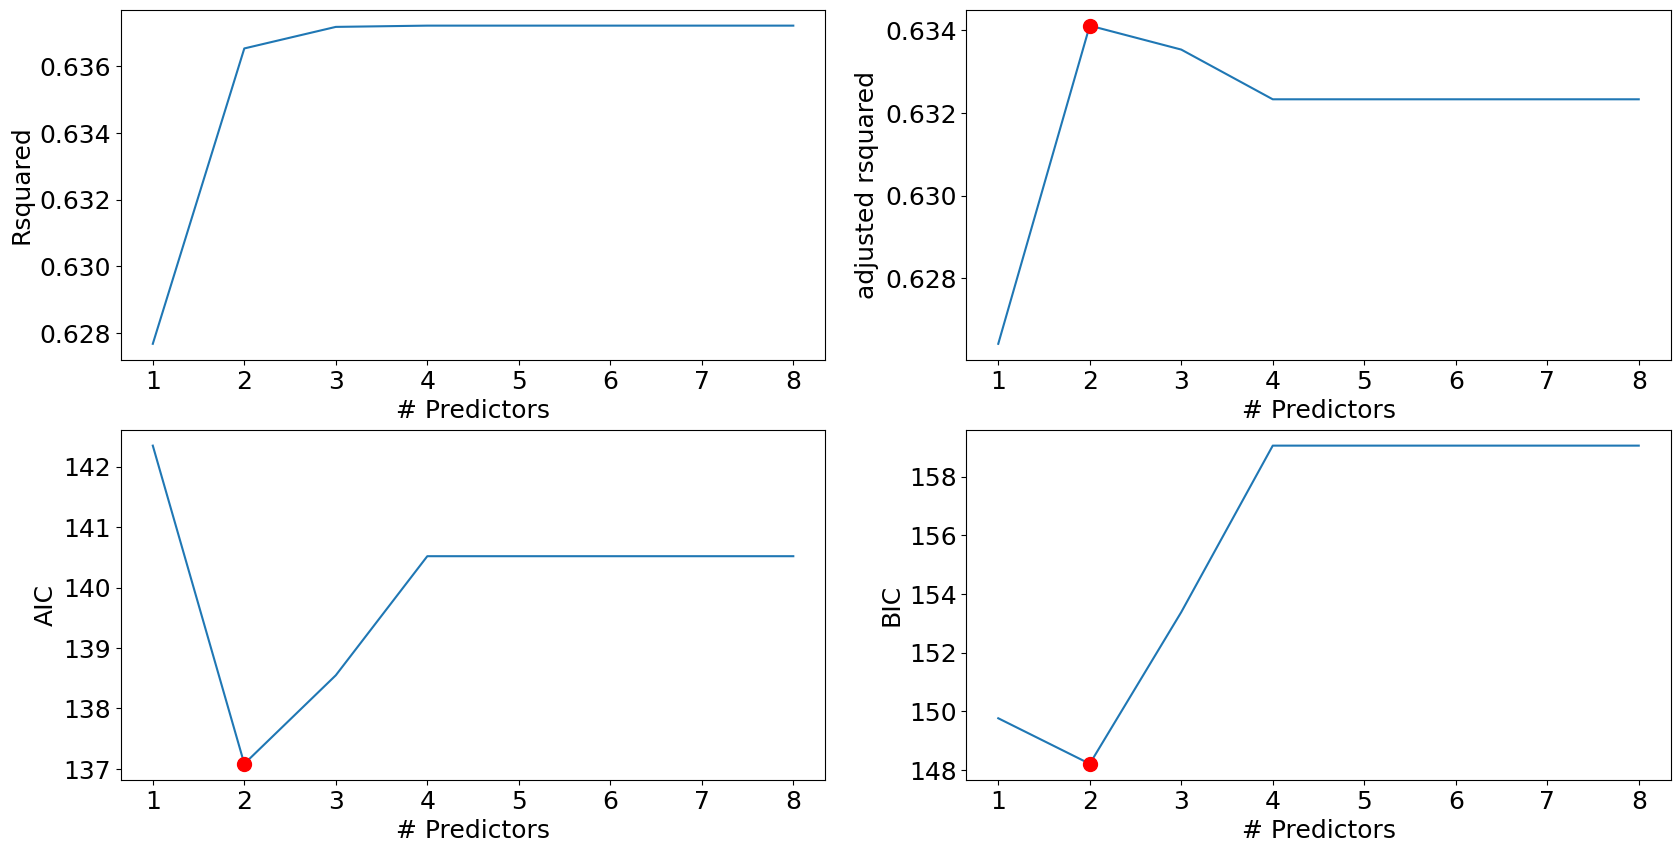

In [128]:
best_sub_plots()

In [147]:
best_subset_model_away = models_best.loc[2,'model']
best_subset_model_away.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        binary_playoffs   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     261.0
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           3.22e-66
Time:                        21:37:19   Log-Likelihood:                -65.543
No. Observations:                 301   AIC:                             137.1
Df Residuals:                     298   BIC:                             148.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.8113      0.358     -2.266      0.024      -1.516      -0.107
total_goals_against    -0.0028      0.001     -2.697      0.007      -0.005      -0.001
total_wins              0.0485      0.004     13.722      0.000       0.042       0.055
==============================================================================
Omnibus:                       27.449   Durbin-Watson:                   2.173
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.134
Skew:                          -0.166   Prob(JB):                      0.00630
Kurtosis:                       2.165   Cond. No.                     4.82e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""